# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

In [2]:
import io
%cd "C:\Users\svs\Downloads\Capstone project"

C:\Users\svs\Downloads\Capstone project


# Reading the dataset

In [3]:
Invehicle=pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [4]:
# Head() is the function we Prints the Starting 5 Rows Default
Invehicle.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# Tail() is funcation we Print Last 5 Rows Default
Invehicle.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [6]:
Invehicle.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

### Distribution of classes

In [7]:
Y_counts = Invehicle.groupby('Y').Y.count()
print('Accepted coupon:',Y_counts[1],round(Y_counts[1]/Invehicle.shape[0]*100,3),'%')
print('Rejected coupon:',Y_counts[0],round(Y_counts[0]/Invehicle.shape[0]*100,3),'%')

Accepted coupon: 7210 56.843 %
Rejected coupon: 5474 43.157 %


# Checking for datatype mismatches

In [8]:
# Info() is a funaction it is used find the about whole Data in Table like Number of Rows, Numbers of Columns,
# DataTypes, Size of table...etc

Invehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
Invehicle.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

# Checking for missing values

In [10]:
Invehicle.isnull().sum().sort_values(ascending=False)/Invehicle.shape[0]

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
destination             0.000000
passanger               0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
income                  0.000000
occupation              0.000000
education               0.000000
has_children            0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
temperature             0.000000
weather                 0.000000
Y                       0.000000
dtype: float64

# Dropping unwanted variables

In [11]:
# The car variable has the 99% of missing values. So we have to remove that variable.
Invehicle=Invehicle.drop(["car"],axis=1)

In [12]:
Invehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

## Missing Values Imputation after dropping unwanted variable

In [13]:
Invehicle.isnull().sum().sort_values(ascending=False)/Invehicle.shape[0]

CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
destination             0.000000
income                  0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
occupation              0.000000
passanger               0.000000
education               0.000000
has_children            0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
temperature             0.000000
weather                 0.000000
Y                       0.000000
dtype: float64

In [14]:
for col in Invehicle.columns:
    Invehicle[col]=Invehicle[col].fillna(Invehicle[col].value_counts().idxmax())
# The idxmax() method returns a Series with the index of the maximum value for each column. 

In [15]:
Invehicle.isnull().sum().sort_values(ascending=False)/Invehicle.shape[0]

destination             0.0
income                  0.0
direction_opp           0.0
direction_same          0.0
toCoupon_GEQ25min       0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ5min        0.0
Restaurant20To50        0.0
RestaurantLessThan20    0.0
CarryAway               0.0
CoffeeHouse             0.0
Bar                     0.0
occupation              0.0
passanger               0.0
education               0.0
has_children            0.0
maritalStatus           0.0
age                     0.0
gender                  0.0
expiration              0.0
coupon                  0.0
time                    0.0
temperature             0.0
weather                 0.0
Y                       0.0
dtype: float64

# Exploratory Data Analysis (EDA)

#### Since all attributes are categorical, we are going to look at discreet distributions of various variables with the target variable.

In [16]:
pd.crosstab(Invehicle.coupon,Invehicle.Y)

Y,0,1
coupon,,
Bar,1190,827
Carry out & Take away,633,1760
Coffee House,2001,1995
Restaurant(20-50),834,658
Restaurant(<20),816,1970


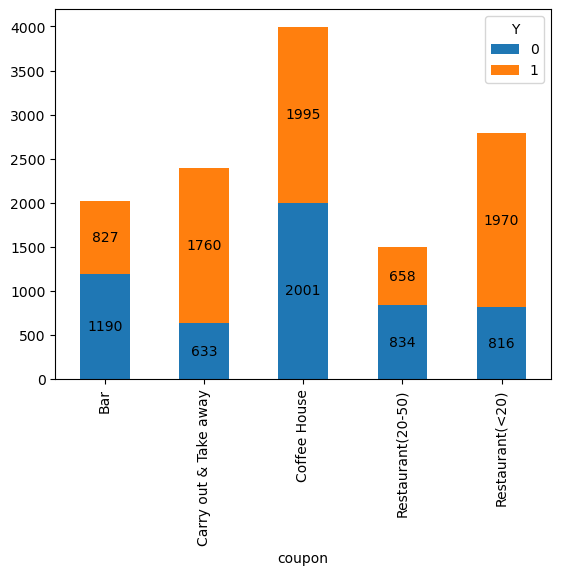

In [17]:
df=pd.crosstab(Invehicle.coupon,Invehicle.Y)
ax=df.plot.bar(stacked=True)
for i in ax.containers:
    ax.bar_label(i,fontsize=10,label_type="center")

In [18]:
pd.crosstab(Invehicle.CoffeeHouse,Invehicle.Y)

Y,0,1
CoffeeHouse,,
1~3,1116,2109
4~8,654,1130
gt8,463,648
less1,1641,1961
never,1600,1362


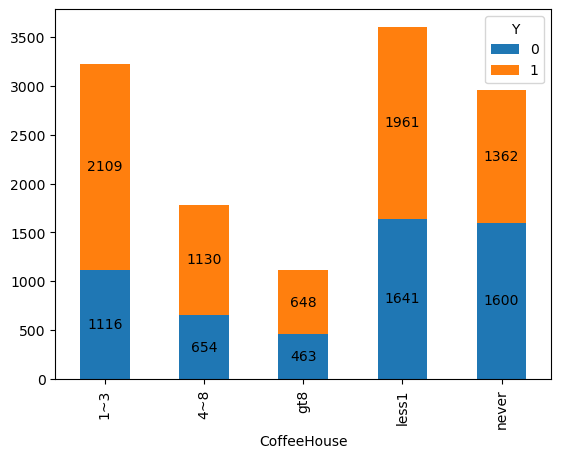

In [19]:
df=pd.crosstab(Invehicle.CoffeeHouse,Invehicle.Y)
ax=df.plot.bar(stacked=True)
for i in ax.containers:
    ax.bar_label(i,fontsize=10,label_type="center")

In [20]:
pd.crosstab(Invehicle.Bar,Invehicle.Y)

Y,0,1
Bar,,
1~3,935,1538
4~8,390,686
gt8,148,201
less1,1519,1963
never,2482,2822


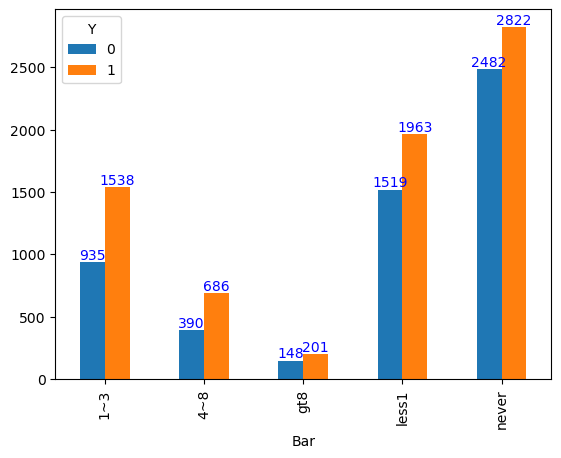

In [21]:
df=pd.crosstab(Invehicle.Bar,Invehicle.Y).plot(kind="bar")
for i in df.containers:
    df.bar_label(i,fontsize=10,color="blue")

In [22]:
pd.crosstab(Invehicle.Y,Invehicle.destination)

destination,Home,No Urgent Place,Work
Y,,,
0,1598,2301,1575
1,1639,3982,1589


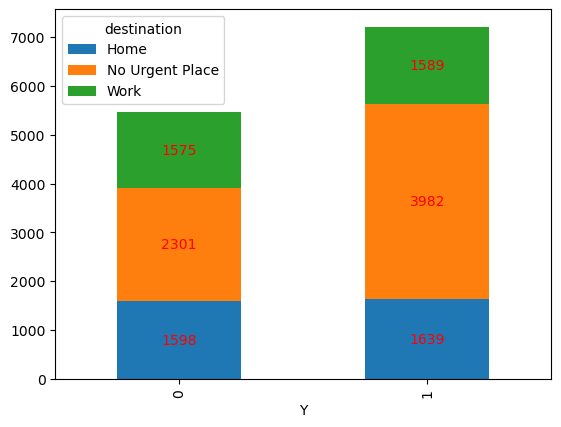

In [23]:
df=pd.crosstab(Invehicle.Y,Invehicle.destination)
ax=df.plot.bar(stacked=True)
for i in ax.containers:
    ax.bar_label(i,fontsize=10,color="red",label_type="center")

In [24]:
pd.crosstab(Invehicle.Y,Invehicle.expiration)

expiration,1d,2h
Y,,
0,2655,2819
1,4436,2774


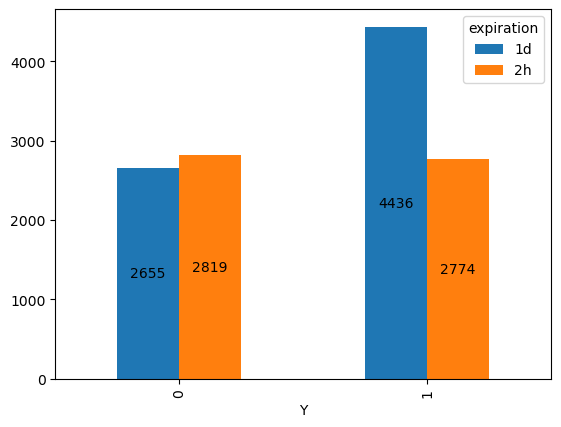

In [25]:
df=pd.crosstab(Invehicle.Y,Invehicle.expiration).plot(kind="bar")
for i in df.containers:
    df.bar_label(i,fontsize=10,label_type="center")

In [26]:
pd.crosstab(Invehicle.Y,Invehicle.time)

time,10AM,10PM,2PM,6PM,7AM
Y,,,,,
0,891,986,680,1342,1575
1,1384,1020,1329,1888,1589


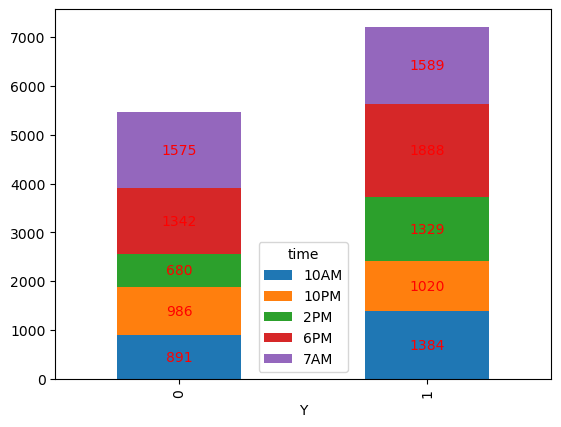

In [27]:
df=pd.crosstab(Invehicle.Y,Invehicle.time)
ax=df.plot.bar(stacked=True)
for i in ax.containers:
    ax.bar_label(i,fontsize=10,color="red",label_type="center")

In [28]:
pd.crosstab(Invehicle.Y,Invehicle.direction_opp)

direction_opp,0,1
Y,,
0,1138,4336
1,1586,5624


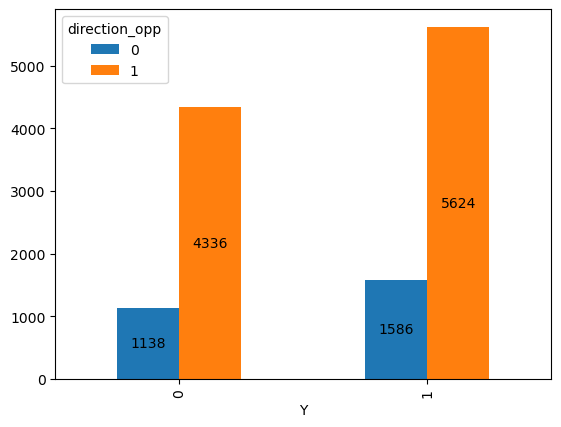

In [29]:
df=pd.crosstab(Invehicle.Y,Invehicle.direction_opp).plot(kind="bar")
for i in df.containers:
    df.bar_label(i,fontsize=10,label_type="center")

# Hypothesis Testing

In [30]:
pd.crosstab(Invehicle.Y,Invehicle.coupon)

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
Y,,,,,
0,1190,633,2001,834,816
1,827,1760,1995,658,1970


In [31]:
from scipy.stats import chi2_contingency
# Because of having all categorical variables we are using chi2_contingency.

In [32]:
chi2_contingency(pd.crosstab(Invehicle.Y,Invehicle.coupon)) 
# Since p-valu8.575341747082738e-188 is less than 0.05,reject null

Chi2ContingencyResult(statistic=873.6378240374827, pvalue=8.575341747082738e-188, dof=4, expected_freq=array([[ 870.47130243, 1032.7406181 , 1724.54304636,  643.89845475,
        1202.34657837],
       [1146.52869757, 1360.2593819 , 2271.45695364,  848.10154525,
        1583.65342163]]))

In [33]:
pd.crosstab(Invehicle.Y,Invehicle.CoffeeHouse)

CoffeeHouse,1~3,4~8,gt8,less1,never
Y,,,,,
0,1116,654,463,1641,1600
1,2109,1130,648,1961,1362


In [34]:
chi2_contingency(pd.crosstab(Invehicle.Y,Invehicle.CoffeeHouse))
# Since p-value=4.171544970829023e-59 less than 0.05,reject null

Chi2ContingencyResult(statistic=278.7370103342187, pvalue=4.171544970829023e-59, dof=4, expected_freq=array([[1391.80463576,  769.91611479,  479.47130243, 1554.50551876,
        1278.30242826],
       [1833.19536424, 1014.08388521,  631.52869757, 2047.49448124,
        1683.69757174]]))

In [35]:
pd.crosstab(Invehicle.Y,Invehicle.Bar)

Bar,1~3,4~8,gt8,less1,never
Y,,,,,
0,935,390,148,1519,2482
1,1538,686,201,1963,2822


In [36]:
chi2_contingency(pd.crosstab(Invehicle.Y,Invehicle.Bar))
# Since p-value=3.133234600310471e-16 is less than 0.05,reject null

Chi2ContingencyResult(statistic=78.79615560606989, pvalue=3.133234600310471e-16, dof=4, expected_freq=array([[1067.26600442,  464.36644592,  150.61699779, 1502.71743929,
        2289.03311258],
       [1405.73399558,  611.63355408,  198.38300221, 1979.28256071,
        3014.96688742]]))

In [37]:
pd.crosstab(Invehicle.Y,Invehicle.destination)

destination,Home,No Urgent Place,Work
Y,,,
0,1598,2301,1575
1,1639,3982,1589


In [38]:
chi2_contingency(pd.crosstab(Invehicle.Y,Invehicle.destination))
# Since p-value=8.40265678045787e-48 is less than 0.05,reject null

Chi2ContingencyResult(statistic=216.79107304896826, pvalue=8.40265678045787e-48, dof=2, expected_freq=array([[1396.98344371, 2711.53752759, 1365.4790287 ],
       [1840.01655629, 3571.46247241, 1798.5209713 ]]))

In [39]:
pd.crosstab(Invehicle.Y,Invehicle.expiration)

expiration,1d,2h
Y,,
0,2655,2819
1,4436,2774


In [40]:
chi2_contingency(pd.crosstab(Invehicle.Y,Invehicle.expiration))
# Since p-value=2.2875426931245618e-48 is less than 0.05,reject null

Chi2ContingencyResult(statistic=213.56841512202195, pvalue=2.2875426931245618e-48, dof=1, expected_freq=array([[3060.24392936, 2413.75607064],
       [4030.75607064, 3179.24392936]]))

In [41]:
pd.crosstab(Invehicle.Y,Invehicle.time)

time,10AM,10PM,2PM,6PM,7AM
Y,,,,,
0,891,986,680,1342,1575
1,1384,1020,1329,1888,1589


In [42]:
chi2_contingency(pd.crosstab(Invehicle.Y,Invehicle.time))
# Since p-value=8.37562170116923e-37 is less than 0.05,reject null

Chi2ContingencyResult(statistic=175.10786986701888, pvalue=8.37562170116923e-37, dof=4, expected_freq=array([[ 981.81567329,  865.72406181,  867.0187638 , 1393.96247241,
        1365.4790287 ],
       [1293.18432671, 1140.27593819, 1141.9812362 , 1836.03752759,
        1798.5209713 ]]))

In [43]:
pd.crosstab(Invehicle.Y,Invehicle.direction_opp)

direction_opp,0,1
Y,,
0,1138,4336
1,1586,5624


In [44]:
chi2_contingency(pd.crosstab(Invehicle.Y,Invehicle.direction_opp))
# Since p-value=0.10541990881286277 greater than 0.05,not reject null

Chi2ContingencyResult(statistic=2.6215727200825305, pvalue=0.10541990881286277, dof=1, expected_freq=array([[1175.58940397, 4298.41059603],
       [1548.41059603, 5661.58940397]]))

### Correlation of numeric categorical features

In [45]:
import seaborn as sns

C:\Users\svs\AppData\Local\Temp\ipykernel_1500\4234689645.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Invehicle.corr(),annot=True)


<Axes: >

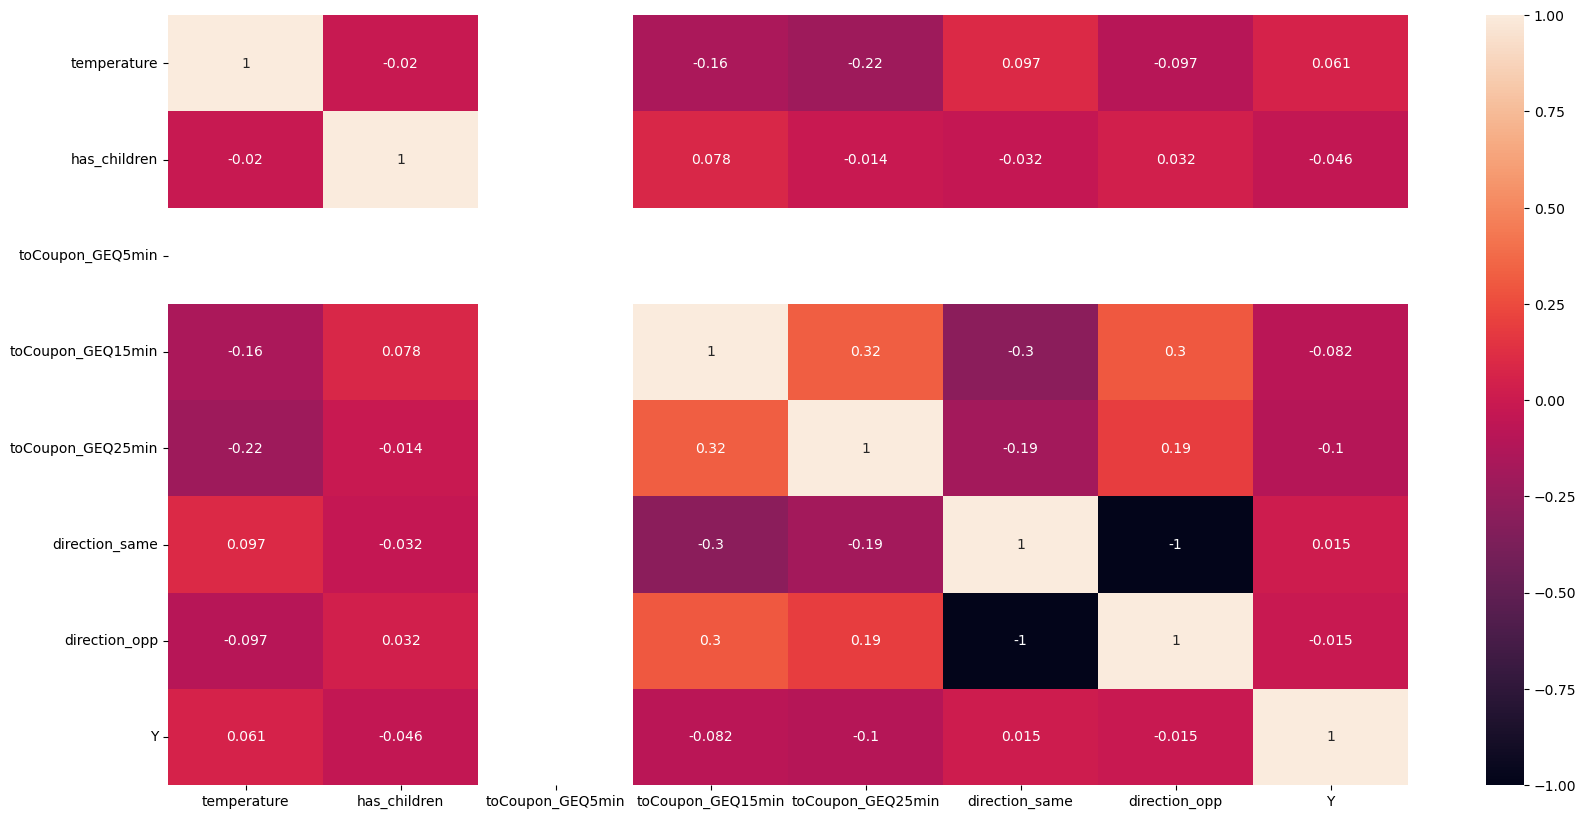

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(Invehicle.corr(),annot=True)

In [47]:
Invehicle=Invehicle.drop(['toCoupon_GEQ5min'],axis=1)

C:\Users\svs\AppData\Local\Temp\ipykernel_1500\4234689645.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Invehicle.corr(),annot=True)


<Axes: >

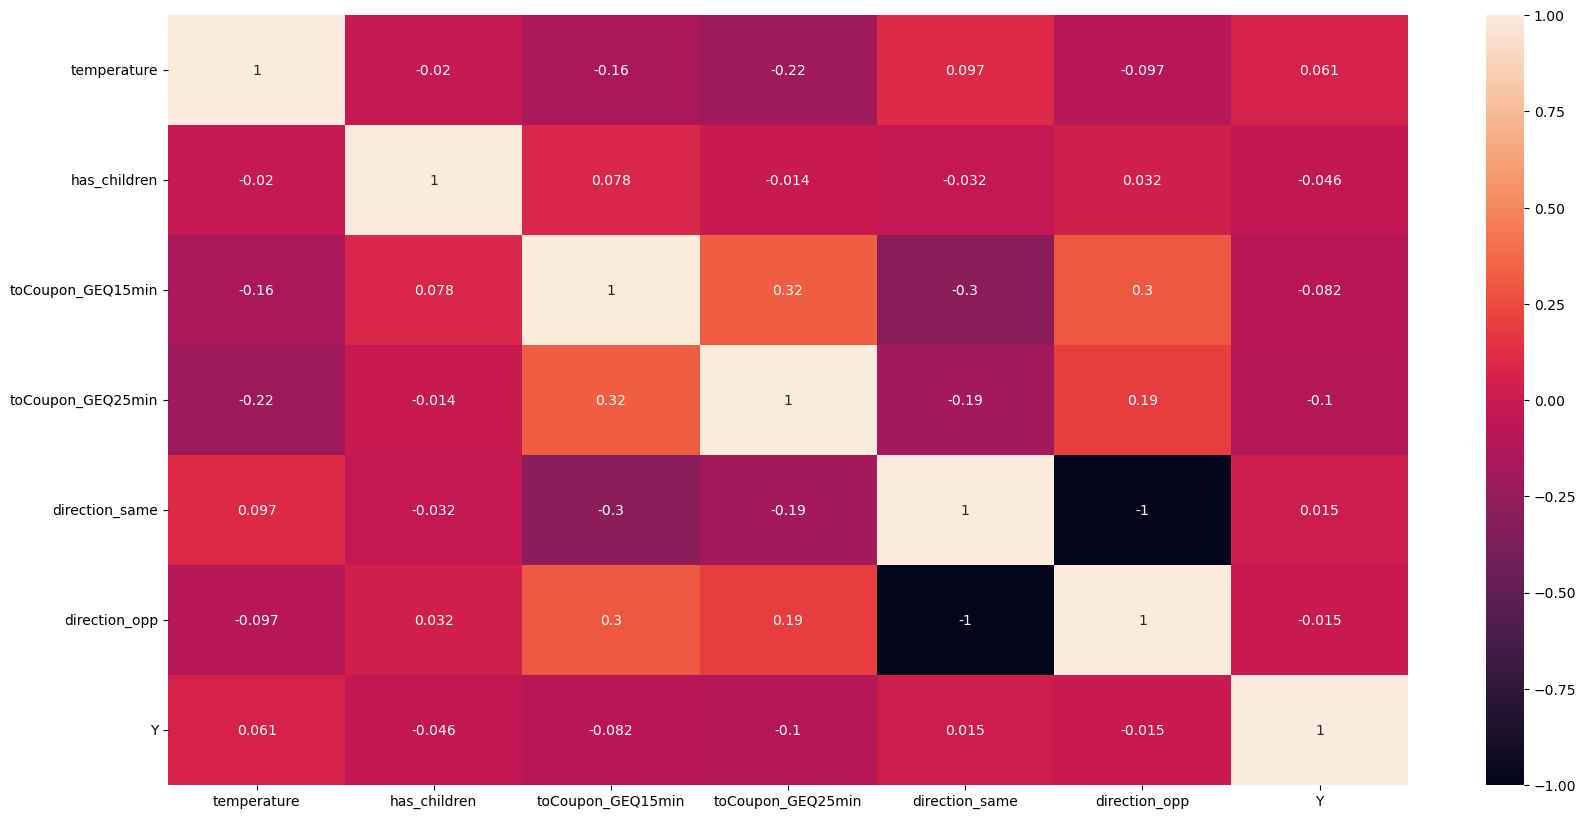

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(Invehicle.corr(),annot=True)

## Splitting data into numeric and categorical variables

In [49]:
Invehicle.columns 

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [50]:
objcols=Invehicle[['destination', 'passanger', 'weather','time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50']]

In [51]:
numcols=Invehicle[['temperature','has_children','toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp']]

## get_dummies for objcols

In [52]:
# The get_dummies function is used to convert categorical variables into dummy or indicator variables. 
# A dummy or indicator variable can have a value of 0 or 1.
objcols_dummy=pd.get_dummies(objcols,columns=['destination', 'passanger', 'weather','time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50'])

In [53]:
objcols_dummy.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


## scaling for numcols

In [54]:
# We scale the data before feeding it to the model because To ensure that the gradient descent moves smoothly 
# towards the minima and that the steps for gradient descent are updated at the same rate for all the features.
from sklearn.preprocessing import StandardScaler

In [55]:
stdscr=StandardScaler()

In [56]:
numcols_stdscr=stdscr.fit_transform(numcols)

In [57]:
numcols_stdscr=pd.DataFrame(numcols_stdscr,columns=numcols.columns)

In [58]:
numcols_stdscr.head()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,-0.433430,1.189378,-1.131581,-0.367745,-0.522967,0.522967
1,0.871799,1.189378,-1.131581,-0.367745,-0.522967,0.522967
2,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967
3,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967
4,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967


In [59]:
# combining the numeric and categorical variables after cleaning the data
Invehicle_clean=pd.concat([objcols_dummy,numcols_stdscr,Invehicle.Y],axis=1)

In [60]:
Invehicle_clean.shape

(12684, 109)

# Splitting the data into X and y

### Splitted the data into X as independent variables and y as dependent variable to build the models

In [61]:
X=Invehicle_clean.drop("Y",axis=1)
y=Invehicle_clean.Y

### Due to imbalanced data here we are using sampling method.

In [62]:
from imblearn.over_sampling import SMOTENC

In [63]:
X.shape

(12684, 108)

In [64]:
X.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,-0.433430,1.189378,-1.131581,-0.367745,-0.522967,0.522967
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0.871799,1.189378,-1.131581,-0.367745,-0.522967,0.522967
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967


In [65]:
smote=SMOTENC(categorical_features=list(range(0,45)),random_state=42)

In [66]:
X_smt,y_smt=smote.fit_resample(X,y)

In [67]:
y_smt=pd.DataFrame(y_smt)

In [68]:
y_smt.value_counts()

Y
0    7210
1    7210
dtype: int64

# Model Building

# 1) Logistic Regression

### Logistic Regression is used when the classification problem is binary
### i.e, yes or no and true or false

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,classification_report
from sklearn.model_selection import cross_val_score

In [70]:
logitreg=LogisticRegression()

In [71]:
logitregmodel=logitreg.fit(X_smt,y_smt)

C:\Users\svs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
logitregmodel.score(X_smt,y_smt)

0.7257281553398058

In [73]:
logpredict=logitregmodel.predict(X_smt)

In [74]:
pd.DataFrame(np.exp(logpredict)).to_csv("logitreg.csv")

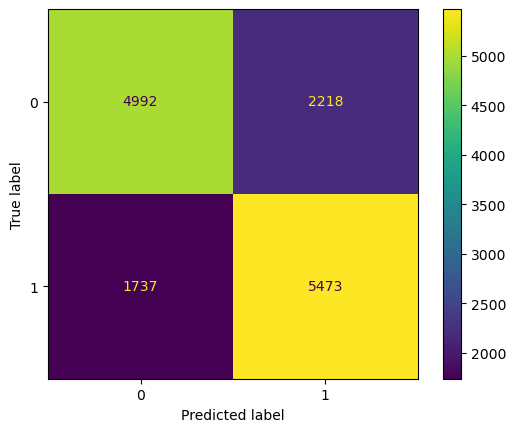

In [75]:
ConfusionMatrixDisplay.from_predictions(y_smt,logpredict)

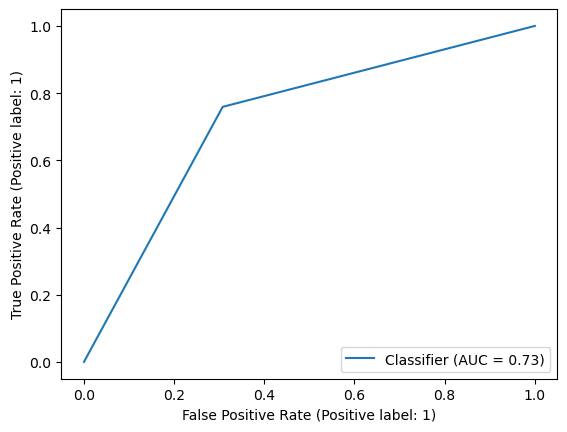

In [76]:
RocCurveDisplay.from_predictions(y_smt,logpredict)

In [77]:
print(classification_report(y_smt,logpredict))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72      7210
           1       0.71      0.76      0.73      7210

    accuracy                           0.73     14420
   macro avg       0.73      0.73      0.73     14420
weighted avg       0.73      0.73      0.73     14420



In [78]:
cross_val_score(logitreg,X_smt,y_smt)

C:\Users\svs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\svs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

array([0.61719834, 0.61754508, 0.5409154 , 0.64667129, 0.76733703])

In [79]:
np.mean([0.61719834, 0.61754508, 0.5409154 , 0.64667129, 0.76733703])

0.637933428

# 2) Support Vector Machine (SVM)

### Similar to decision tree and random forest, support vector machine can be used in both classification and regression, SVC (support vector classifier) is for classification problem.

In [80]:
from sklearn.svm import SVC

In [81]:
svc=SVC()

In [82]:
svcmodel=svc.fit(X_smt,y_smt)

C:\Users\svs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
svcmodel.score(X_smt,y_smt)

0.8416088765603329

In [84]:
svcpredict=svcmodel.predict(X_smt)

In [85]:
pd.DataFrame(np.exp(svcpredict)).to_csv("svc.csv")

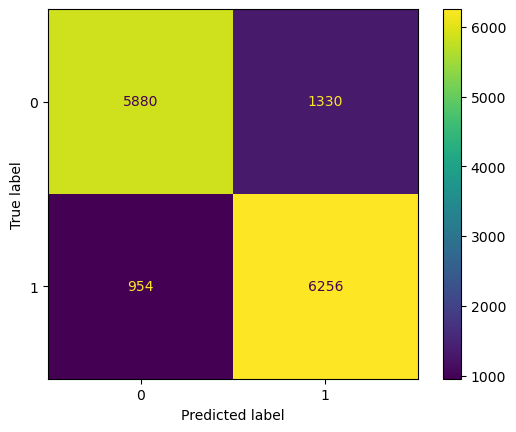

In [86]:
ConfusionMatrixDisplay.from_predictions(y_smt,svcpredict)

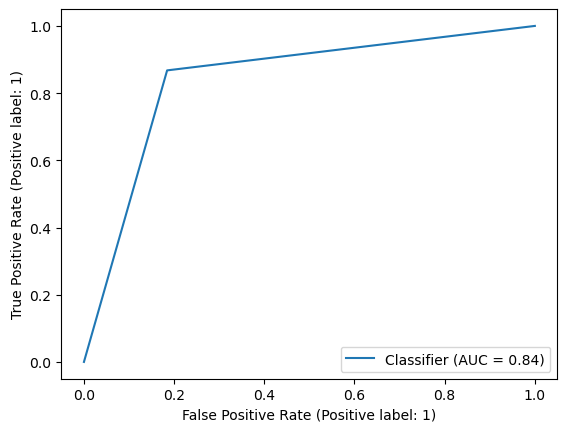

In [87]:
RocCurveDisplay.from_predictions(y_smt,svcpredict)

In [88]:
print(classification_report(y_smt,svcpredict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7210
           1       0.82      0.87      0.85      7210

    accuracy                           0.84     14420
   macro avg       0.84      0.84      0.84     14420
weighted avg       0.84      0.84      0.84     14420



In [89]:
cross_val_score(svc,X_smt,y_smt)

C:\Users\svs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

array([0.65429958, 0.54160888, 0.42649098, 0.46289875, 0.60610264])

In [90]:
np.mean([0.65429958, 0.54160888, 0.42649098, 0.46289875, 0.60610264])

0.5382801660000001

# 3) K-Nearest Neighbour (KNN)

### k nearest neighbour algorithm as representing each data point in a n dimensional space — which is defined by n features. 

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier()

In [93]:
knnmodel=knn.fit(X_smt,y_smt)

C:\Users\svs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [94]:
knnmodel.score(X_smt,y_smt)

0.8253120665742025

In [95]:
knnpredict=knnmodel.predict(X_smt)

In [96]:
pd.DataFrame(np.exp(knnpredict)).to_csv("knn.csv")

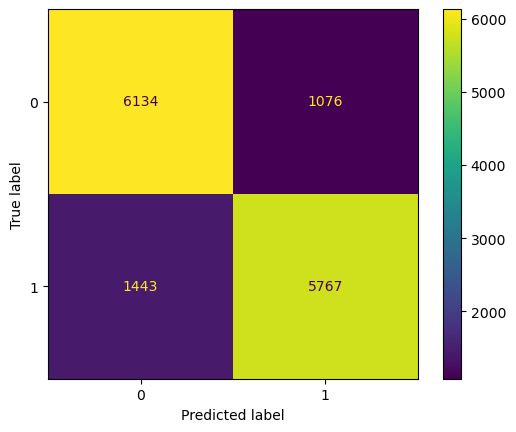

In [97]:
ConfusionMatrixDisplay.from_predictions(y_smt,knnpredict)

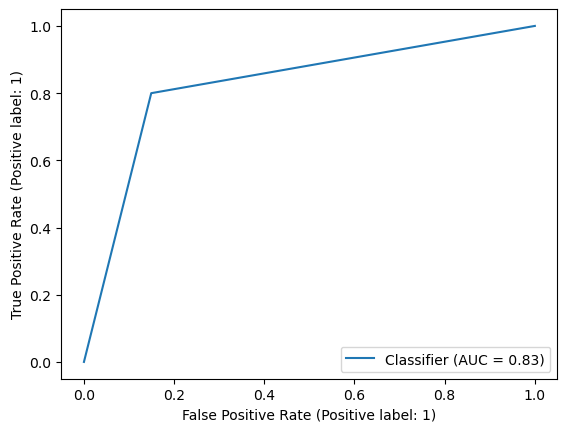

In [98]:
RocCurveDisplay.from_predictions(y_smt,knnpredict)

In [99]:
print(classification_report(y_smt,knnpredict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      7210
           1       0.84      0.80      0.82      7210

    accuracy                           0.83     14420
   macro avg       0.83      0.83      0.83     14420
weighted avg       0.83      0.83      0.83     14420



In [100]:
cross_val_score(knn,X_smt,y_smt)

C:\Users\svs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

array([0.60575589, 0.46532594, 0.4001387 , 0.38418863, 0.54854369])

In [101]:
np.mean([0.60575589, 0.46532594, 0.4001387 , 0.38418863, 0.54854369])

0.48079057000000003

# 4) Gradient Boosting Classifier

### This algorithm combine many weak learning models together to create a strong predictive model.

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
GBC=GradientBoostingClassifier(n_estimators=1000)

In [104]:
GBCmodel=GBC.fit(X_smt,y_smt)

C:\Users\svs\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
GBCmodel.score(X_smt,y_smt)

0.8316920943134536

In [106]:
GBCpredict=GBCmodel.predict(X_smt)

In [107]:
pd.DataFrame(np.exp(GBCpredict)).to_csv("GBC.csv")

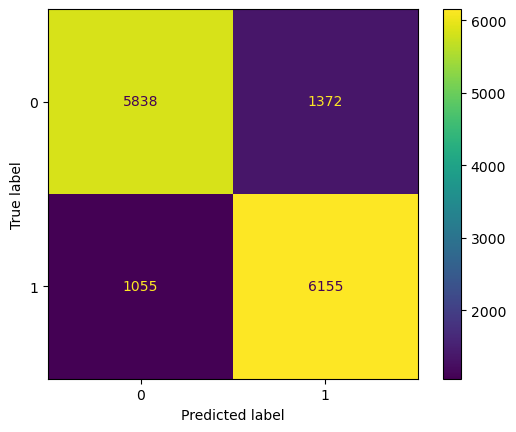

In [108]:
ConfusionMatrixDisplay.from_predictions(y_smt,GBCpredict)

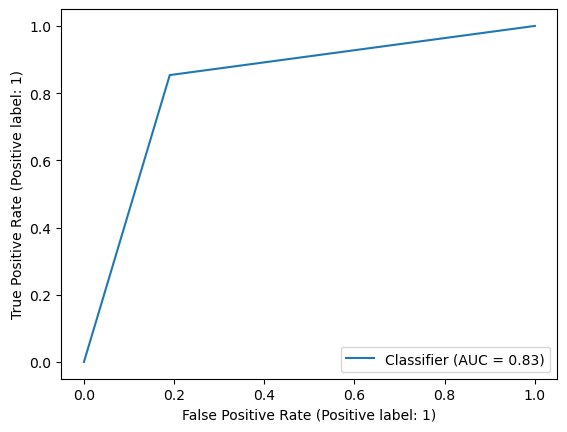

In [109]:
RocCurveDisplay.from_predictions(y_smt,GBCpredict)

In [110]:
print(classification_report(y_smt,GBCpredict))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7210
           1       0.82      0.85      0.84      7210

    accuracy                           0.83     14420
   macro avg       0.83      0.83      0.83     14420
weighted avg       0.83      0.83      0.83     14420



In [111]:
cross_val_score(GBC,X_smt,y_smt)

C:\Users\svs\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\svs\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

array([0.65846047, 0.57212205, 0.42787795, 0.40915395, 0.58980583])

In [112]:
np.mean([0.65811373, 0.57246879, 0.42753121, 0.40846047, 0.58945908])

0.5312066559999999

# 5)  Decision Tree

### Decision Tree builds a tree branches and each branch considered as if-else statement

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
decision=DecisionTreeClassifier(max_depth=10)

In [115]:
decisionmodel=decision.fit(X_smt,y_smt)

In [116]:
decisionmodel.score(X_smt,y_smt)

0.7997919556171983

In [117]:
treepredict=decisionmodel.predict(X_smt)

In [118]:
pd.DataFrame(np.exp(treepredict)).to_csv("decision.csv")

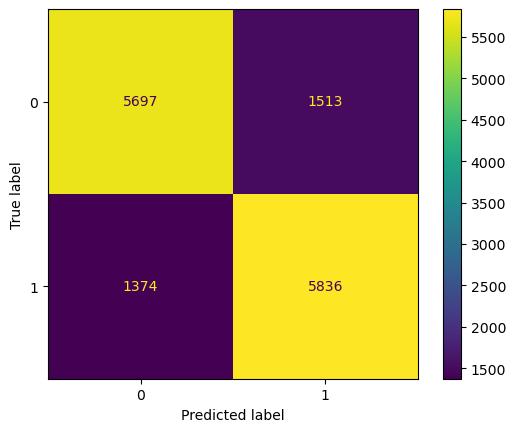

In [119]:
ConfusionMatrixDisplay.from_predictions(y_smt,treepredict)

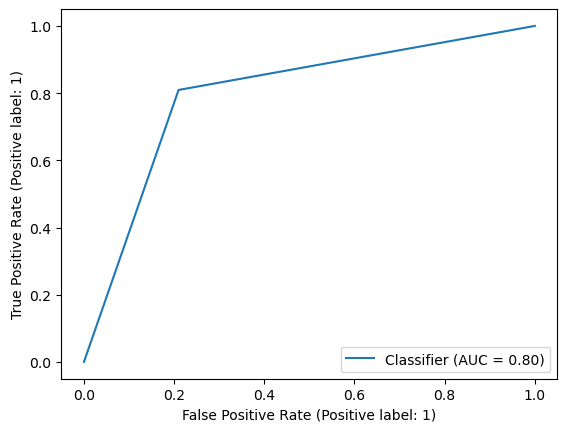

In [120]:
RocCurveDisplay.from_predictions(y_smt,treepredict)

In [121]:
print(classification_report(y_smt,treepredict))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      7210
           1       0.79      0.81      0.80      7210

    accuracy                           0.80     14420
   macro avg       0.80      0.80      0.80     14420
weighted avg       0.80      0.80      0.80     14420



In [122]:
cross_val_score(decision,X_smt,y_smt)

array([0.66816921, 0.59084605, 0.4778086 , 0.50104022, 0.53398058])

In [123]:
np.mean([0.66643551, 0.59188627, 0.48092926, 0.50520111, 0.53085992])

0.555062414